In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
competitor_df = pd.read_csv("competitor-dataset.csv")  # Update file path
historical_df = pd.read_csv("oil and gas.csv")

In [6]:
competitor_df["Date"] = pd.to_datetime(competitor_df["Date"])
historical_df["Date"] = pd.to_datetime(historical_df["Date"])


🔹 Univariate Analysis for Competitor Dataset
Summary Statistics:
                                Date  Closing Price  Selling Price  \
count                          92096   92096.000000   92096.000000   
mean   2011-05-09 15:37:54.079221504      33.255359      39.105341   
min              2000-01-04 00:00:00       0.499900       1.584785   
25%              2005-10-03 00:00:00       2.740875       4.862319   
50%              2011-06-03 00:00:00      16.414000      19.751231   
75%              2016-12-22 00:00:00      58.930000      67.963127   
max              2022-06-17 00:00:00     146.080000     169.573113   
std                              NaN      35.896430      40.531491   

         Volume Sold  
count   92096.000000  
mean    32202.094206  
min         0.000000  
25%      8219.750000  
50%     17786.000000  
75%     44617.000000  
max    355795.000000  
std     36852.939788  

Missing Values:
Symbol           0
Company          0
Date             0
Closing Price    0
Sel

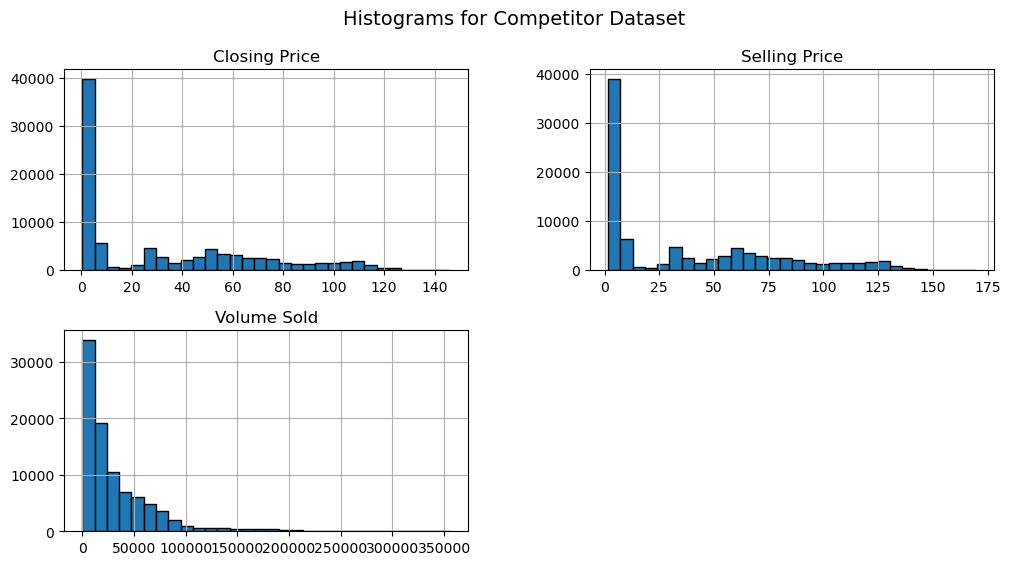

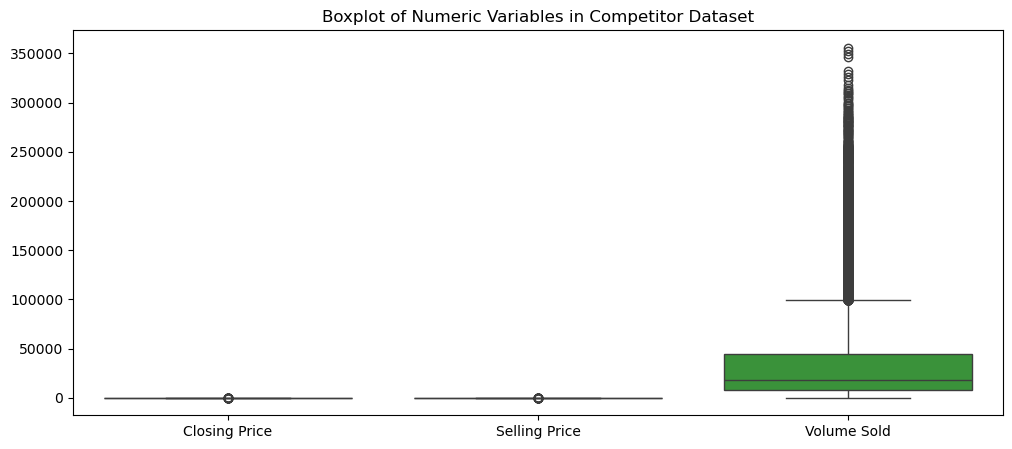


🔹 Univariate Analysis for Historical Dataset
Summary Statistics:
                                Date          Open          High  \
count                          23024  23024.000000  23024.000000   
mean   2011-05-09 15:37:54.079221760     33.360681     33.849664   
min              2000-01-04 00:00:00    -14.000000      0.508500   
25%              2005-10-03 00:00:00      2.741000      2.785000   
50%              2011-06-03 00:00:00     14.364500     15.532500   
75%              2016-12-22 00:00:00     60.652500     61.500000   
max              2022-06-17 00:00:00    146.300000    147.500000   
std                              NaN     36.010741     36.469603   

                Low         Close        Volume  
count  23024.000000  23024.000000  2.302400e+04  
mean      32.849399     33.255359  1.288103e+05  
min      -16.740000      0.499900  0.000000e+00  
25%        2.695675      2.740875  3.291250e+04  
50%       13.850500     16.414000  7.112050e+04  
75%       59.782500  

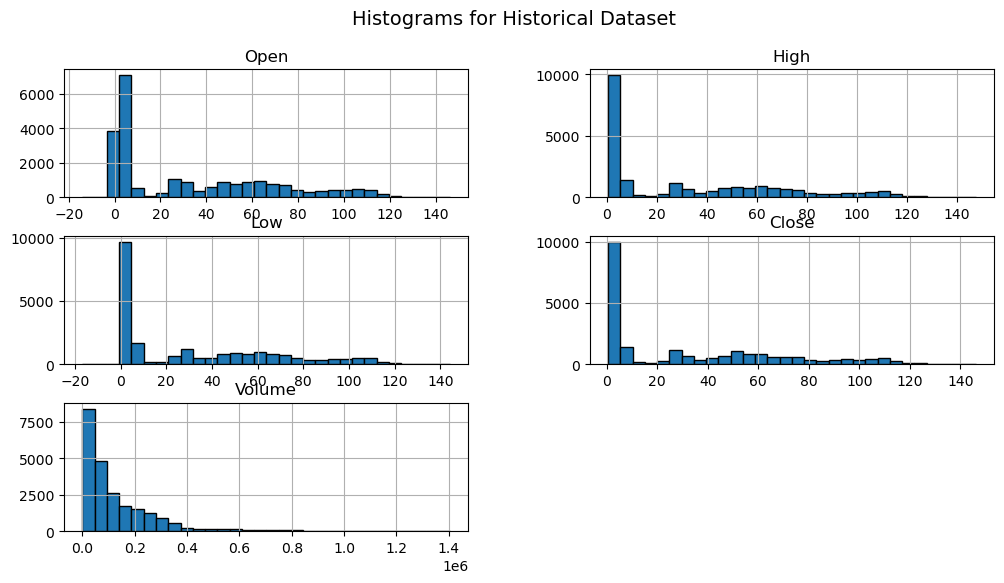

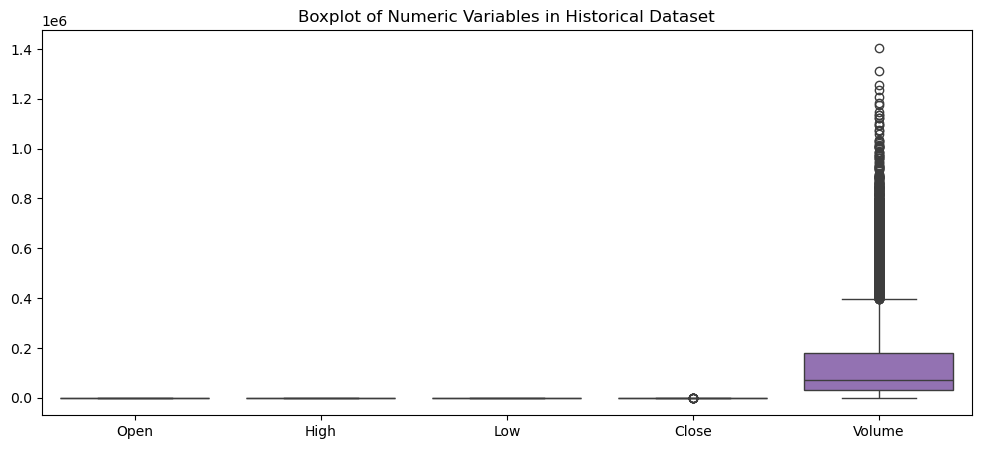

In [8]:
# ========================== #
#   1️⃣ UNIVARIATE ANALYSIS   #
# ========================== #

def univariate_analysis(df, dataset_name):
    """Perform Univariate Analysis on a given dataset."""
    print(f"\n🔹 Univariate Analysis for {dataset_name}")

    # Summary statistics
    print("Summary Statistics:")
    print(df.describe())

    # Missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Histograms
    numeric_cols = df.select_dtypes(include=['number']).columns  # Select numerical columns
    df[numeric_cols].hist(figsize=(12, 6), bins=30, edgecolor='black')
    plt.suptitle(f"Histograms for {dataset_name}", fontsize=14)
    plt.show()

    # Boxplots for outlier detection
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df[numeric_cols])
    plt.title(f"Boxplot of Numeric Variables in {dataset_name}")
    plt.show()

# Perform Univariate Analysis on both datasets
univariate_analysis(competitor_df, "Competitor Dataset")
univariate_analysis(historical_df, "Historical Dataset")



🔹 Bivariate Analysis for Competitor Dataset


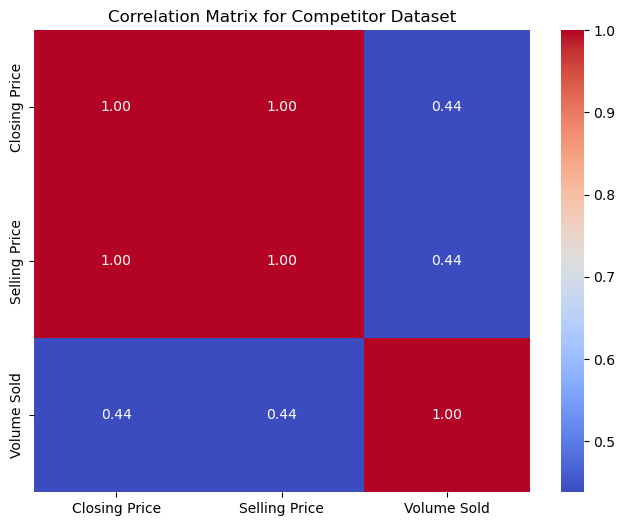

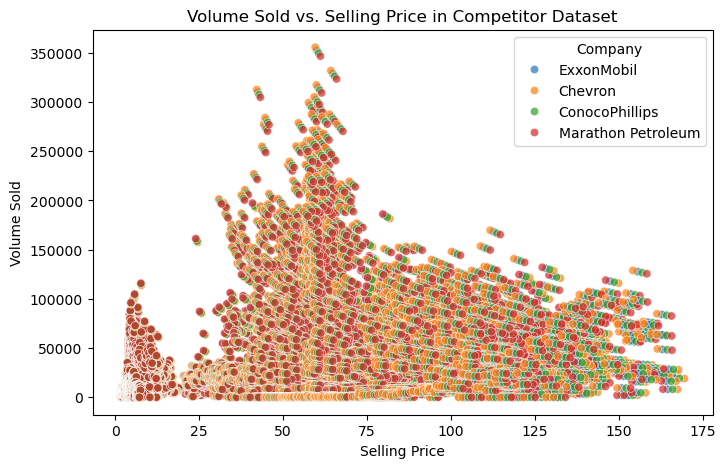

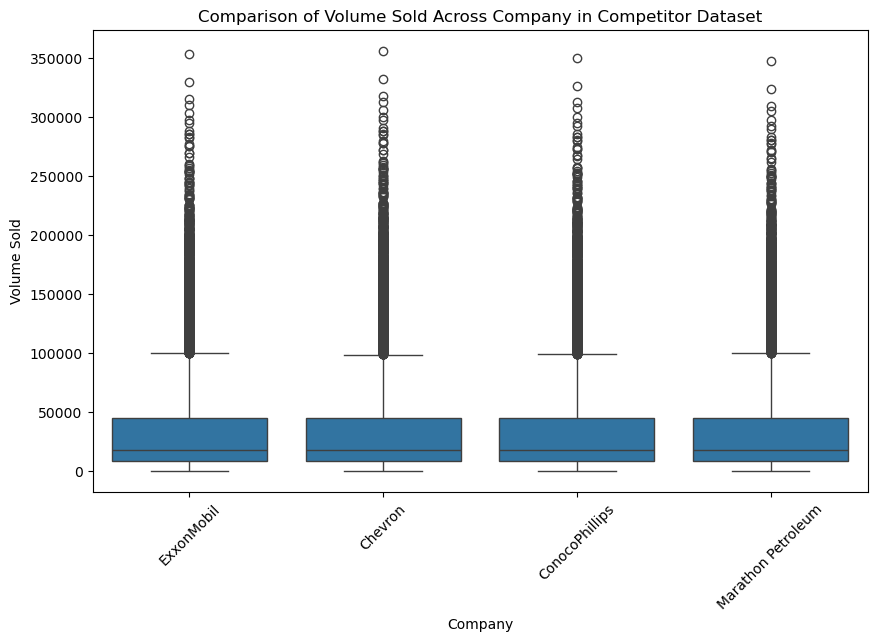


🔹 Bivariate Analysis for Historical Dataset


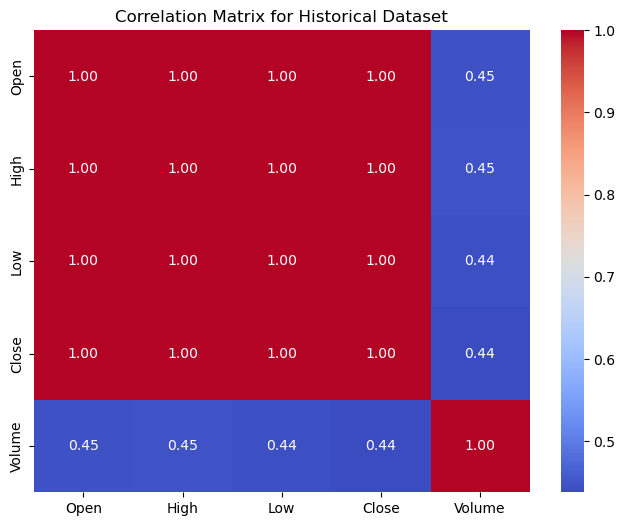

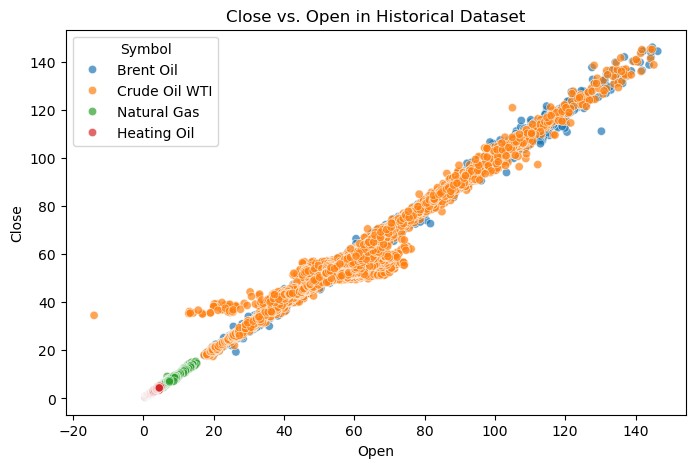

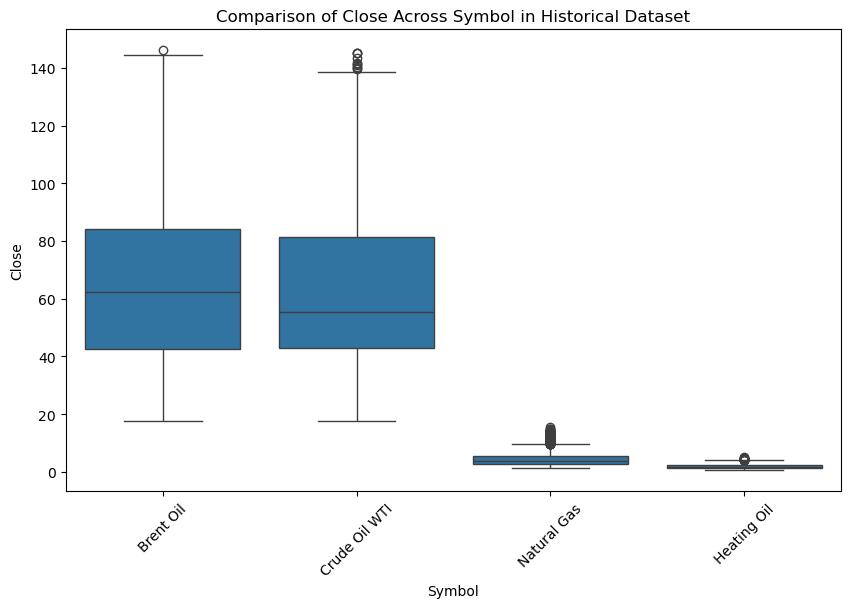


🔹 Bivariate Analysis for Historical Dataset


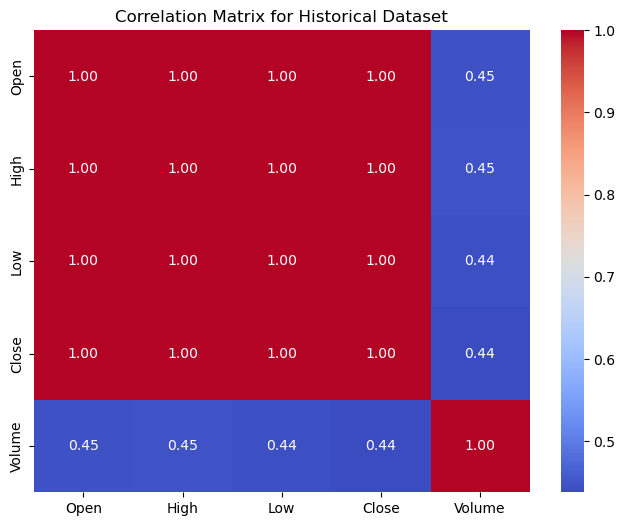

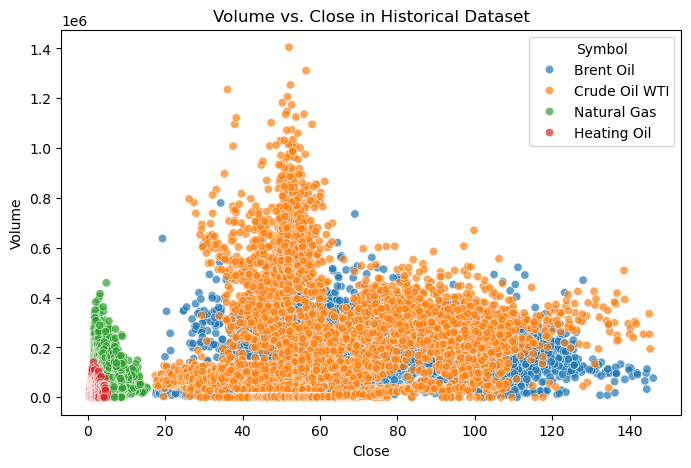

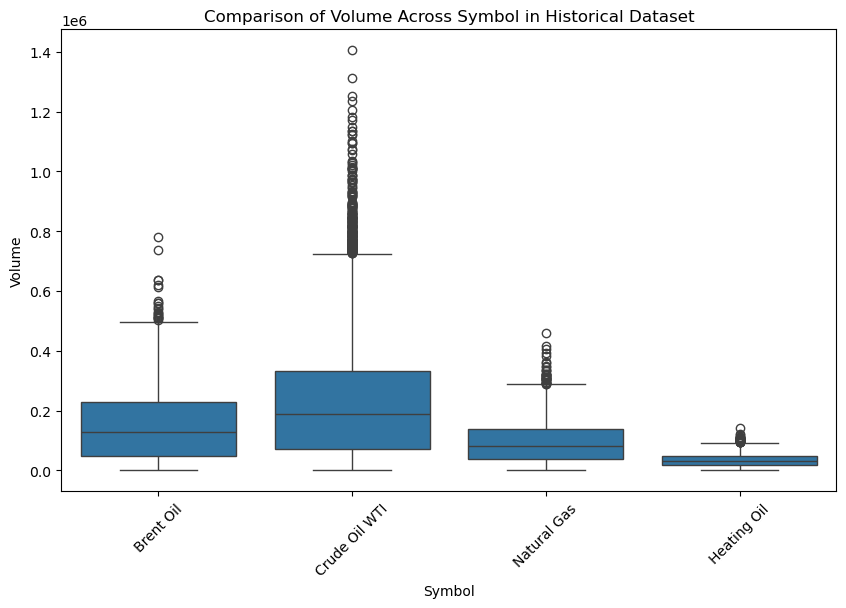

In [10]:
# ========================= #
#   2️⃣ BIVARIATE ANALYSIS   #
# ========================= #

def bivariate_analysis(df, dataset_name, x_col, y_col, hue_col=None):
    """Perform Bivariate Analysis on a given dataset."""
    print(f"\n🔹 Bivariate Analysis for {dataset_name}")

    # Correlation Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix for {dataset_name}")
    plt.show()

    # Scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, alpha=0.7)
    plt.title(f"{y_col} vs. {x_col} in {dataset_name}")
    plt.show()

    # Boxplot (if category column is available)
    if hue_col:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=hue_col, y=y_col)
        plt.xticks(rotation=45)
        plt.title(f"Comparison of {y_col} Across {hue_col} in {dataset_name}")
        plt.show()

# Perform Bivariate Analysis on Competitor Dataset
bivariate_analysis(competitor_df, "Competitor Dataset", "Selling Price", "Volume Sold", "Company")

# Perform Bivariate Analysis on Historical Dataset
bivariate_analysis(historical_df, "Historical Dataset", "Open", "Close", "Symbol")
bivariate_analysis(historical_df, "Historical Dataset", "Close", "Volume", "Symbol")
